# Libarary

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import RobustScaler, StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


1. pH, merupakan parameter asam atau basa status air. Berdasarkan rekomendasi WHO batas maksimum pH yang di izinkan dari 6.5 hingga 8.5
2. Hardness, tingkat kesadahan air dalam mg/L
3. Solids (Total Disolved Solid -TDS) Nilai kandungan termineralisasi air dalam satuan ppm (part per million), batas maksimum adalah 500 mg/L sampai 1000 mg/L untuk air minum
4. Chloramine, Jumlah kandungan chloramine dalam satuan ppm. Kadar Charoline yang di anggap aman untuk air minum adalah 4 mg/L
5. Sulfat, Jumlah kandungan sulfat yang di larutkan dalam satuan ppm
6. Conductivity, Konduktivitas listri dalam air dalam satuan microgram per liter, berdasarkan standar WHO nilai condutivity tidak boleh melibihi 400 
7. Organic Carbon, Jumlah karbon organik dalam kandungan air dalam satuan ppm. Berdasarkan US EPA < 2 mg/L adalah air untuk olahan/minum dan < 4 mg/L digunakan untuk pengolahan
8. Trihalomethanes, Kandungan bahan kimia yang ditemukan dalam kandungan air yang diolah dengan klorin. Kadar Trihalomethanes hingga 80 ppm dianggap aman dalam air minum
9. Turbidity, Ukuran hasil tes kekeruhan air berdasarkan NTU, nilai rekomendasi WHO yaitu 5.00 NTU
10. Potability, Menunjukan apakah air aman untuk diminum 1; aman / dapat diminum, 0; tidak aman / tidak dapat diminum

# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
df.shape

(3276, 10)

Seluruh variabel feature data numerik float64, dan target/label data int64, 1 potable dan 0 not potable

In [5]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


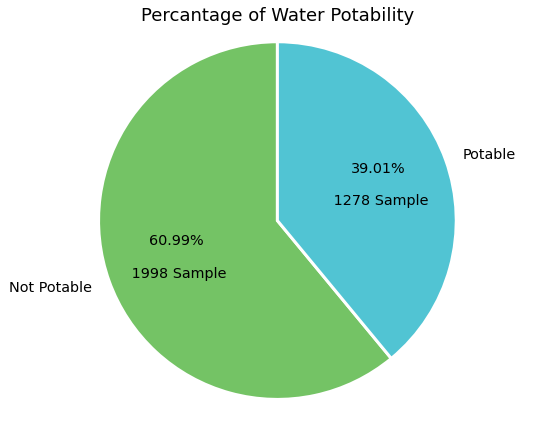

In [6]:
values = list(df['Potability'].value_counts().values)
labels = ['Not Potable','Potable']
color = ['#74C365','#51C4D3']

fig, ax = plt.subplots(figsize=(8,6))
ax.pie(values, labels=labels,  autopct=lambda p:f'{p:.2f}%\n\n {p*sum(values)/100 :.0f} Sample' ,colors=color,
       wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'},
       startangle=90)
ax.set_title('Percantage of Water Potability', size=18)
ax.axis('equal')
plt.tight_layout()
plt.show()

Terdapat 39% sample air yang potable atau aman untuk di konsumsi yaitu sebanyak 1278 sample, dan 60.99% sample air Not Potable sebanyak 1998 sample air yang tidak layak untuk di konsumsi

In [7]:
feature = df.drop('Potability', axis=1)
label = df['Potability']

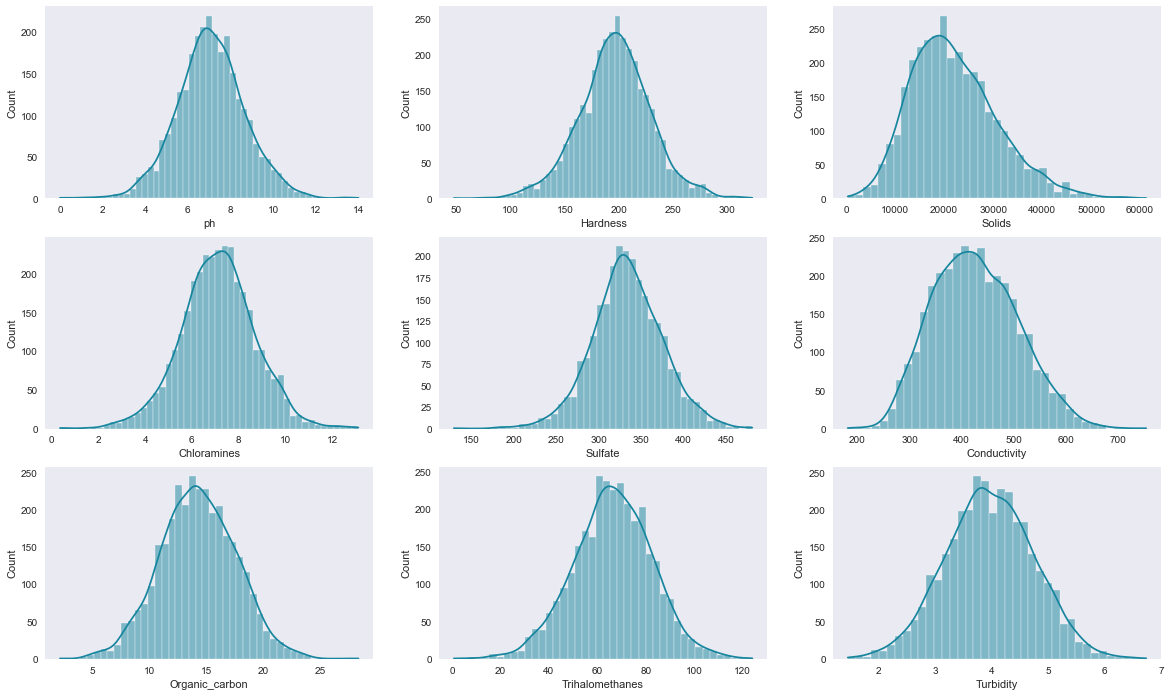

In [8]:
plt.style.use('seaborn')
sns.set_style('dark')
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(20,12))
ax=ax.flatten()
for x, i in enumerate(feature):
    sns.histplot(data=df, x=i, ax=ax[x], kde=True, color='#17869E')

Jika dilihat secara langsung dari histogram diatas distribusi dari setiap data terlihat terdistribusi mendekati normal. Namun ada beberapa variabel yang memiliki skewed seperti variabel Solids dan Conductivity. Nanti kita akan menggunakan uji normalitas untuk memastikan data terdistribusi normal atau tidak

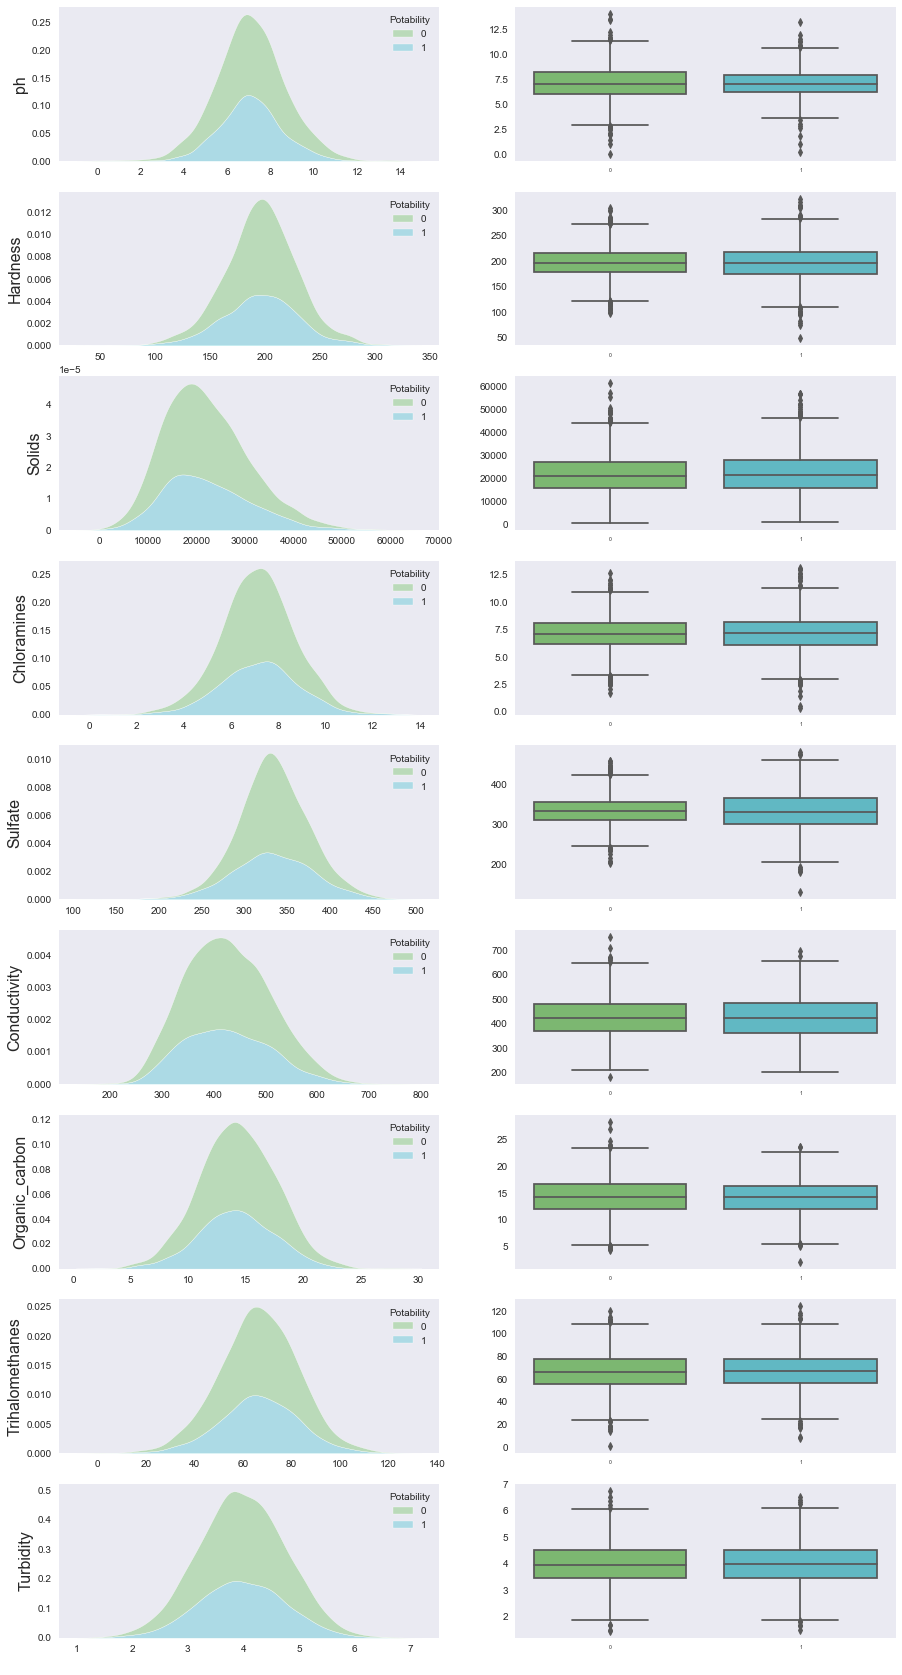

In [9]:
fig, ax = plt.subplots(ncols=2, nrows=9, figsize=(15,30))
i=0
for cols in list(feature.columns):
    sns.kdeplot(feature[cols], fill=True, alpha=0.4, hue = df.Potability, 
                palette=color, multiple='stack', ax=ax[i,0])
    
    sns.boxplot(data= df, y=cols, x='Potability', ax=ax[i, 1],
               palette=color)
    ax[i,0].set_xlabel(' ')
    ax[i,1].set_xlabel(' ')
    ax[i,1].set_ylabel(' ')
    ax[i,1].xaxis.set_tick_params(labelsize=5)
    ax[i,0].set_ylabel(cols, fontsize=16)
    i=i+1


### Missing Values

In [10]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Terlihat terdapat beberapa feature yang memiliki nilai Nan atau missing values

In [11]:
df[['ph','Sulfate','Trihalomethanes']].describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000,6.093092,7.036752,8.062066,14.000000
Sulfate,2495.0,333.775777,41.416840,129.000,307.699498,333.073546,359.950170,481.030642
Trihalomethanes,3114.0,66.396293,16.175008,0.738,55.844536,66.622485,77.337473,124.000000


Walaupun distibusi dari masing-masing variabel yang memiliki nilai NaN terlihat terdistribusi mendekati normal, namun jika dilihat dari boxplot diatas dapat dilihat terdapat beberapa outlier. Oleh karena itu akan lebih aman jika kita mengisi nilai NaN dengan median dari masing-masing variabelnya.

In [12]:
missing_var = ['ph','Sulfate','Trihalomethanes']
for i in missing_var:
    df[i].fillna(df[i].median(), inplace=True)

df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Jika dilihat dari plot diatas, kita dapat melihat dengan jelas perbedaan klasifikasi air yang dapat diminum dan tidak dapat diminum. Contoh distribusi air yang tidak dapat diminum memiliki kandungan konduktifitas listrik (conductivity), tingkat kekeruhan (Trihalomethanes) yang tinggi di bandingkan dengan air yang dapat diminum.

Kita akan mencoba melakukan uji hipotesis untuk melihat perbedaan dari masing-masing distibusi apakah memiliki perbedaan yang signifikan atau tidak

### Uji Normalitas

Sebelum kita melakukan uji hipotesis untuk mengetahui dugaan rata-rata dari dua sample, kita akan melakukan uji normalitas terlebih dahulu untuk memastikan data terdistribusi normal atau tidak, agar kita dapat menentukan pengujian yang tepat

- H0 (Hipotesis Null) : Dapat di asumsikan data terdistribusi Normal
- Ha (Hiptesis Alternatif) : Data tidak dapat kita asumsikan terdistribusi Normal

In [43]:
from scipy.stats import shapiro
from scipy.stats import normaltest

p_val = []
#Shapiro wilk test
for i in feature:
    stat, p_values = normaltest(df[i])
    p_val.append(round(p_values,4))
    if p_values > 0.05:
        print('p_value {}: {}, Terima H0'.format(i, round(p_values,4)))
    else:
        print('p_value {}: {}, Gagal menerima H0'.format(i, round(p_values,4)))

uji_norm = pd.DataFrame(columns=['columns','p_values'])
uji_norm['columns'] = list(feature)
uji_norm['p_values'] = p_val
uji_norm.sort_values(by='p_values', ascending=False)

p_value ph: 0.0, Gagal menerima H0
p_value Hardness: 0.0, Gagal menerima H0
p_value Solids: 0.0, Gagal menerima H0
p_value Chloramines: 0.0, Gagal menerima H0
p_value Sulfate: 0.0, Gagal menerima H0
p_value Conductivity: 0.0, Gagal menerima H0
p_value Organic_carbon: 0.7183, Terima H0
p_value Trihalomethanes: 0.0, Gagal menerima H0
p_value Turbidity: 0.7601, Terima H0


,columns,p_values
8,Turbidity,0.7601
6,Organic_carbon,0.7183
0,ph,0.0000
1,Hardness,0.0000
2,Solids,0.0000
3,Chloramines,0.0000
4,Sulfate,0.0000
5,Conductivity,0.0000
7,Trihalomethanes,0.0000


Dari Hasil uji Normalitas diatas menggunakan Shapiro Wilk test, hanya ada dua variabel yang di asumsikan terdistribusi normal yaitu Turbidity dan Organic Carbon

### T-test & Man Whitney Test

>##### T-test
- H0 (Hipotesis Null): Mean untuk Potability 0 dan 1 di asumsikan sama
- Ha (Hipotesis Alternatif) : Mean untuk Potability 0 dan 1 tidak dapat di asumsikan sama

>##### Man Whitney Test
- H0 (Hipotesis Null): Median untuk Potability 0 dan 1 di asumsikan sama
- Ha (Hipotesis Alternatif) : Median untuk Potability 0 dan 1 tidak dapat di asumsikan sama

In [14]:
norm_dist = ['Turbidity', 'Organic_carbon']
non_dist = df.drop(['Turbidity','Organic_carbon', 'Potability'], axis=1).columns.tolist()

from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

#t_test
p_val_ttest = []
p_val_man = []

#t-test independent
for i in norm_dist:
    pota_1 = df[df['Potability'] == 1][i]
    pota_0 = df[df['Potability'] == 0][i]
    stat, p_val = ttest_ind(pota_1, pota_0)
    p_val_ttest.append(p_val)

ttest = pd.DataFrame(columns=['columns','t-test'])
ttest['columns'] = list(norm_dist)
ttest['t-test'] = p_val_ttest

#Man whitney test
for i in non_dist:
    pota_1 = df[df['Potability'] == 1][i]
    pota_0 = df[df['Potability'] == 0][i]
    result = list(mannwhitneyu(pota_1, pota_0,
    alternative='greater'
    ))
    p_val_man.append(result[1])

manwith = pd.DataFrame(columns=['columns','Mann Withney Test'])
manwith['columns'] = list(non_dist)
manwith['Mann Withney Test'] = p_val_man
manwith = manwith.sort_values(by='Mann Withney Test', ascending=False)

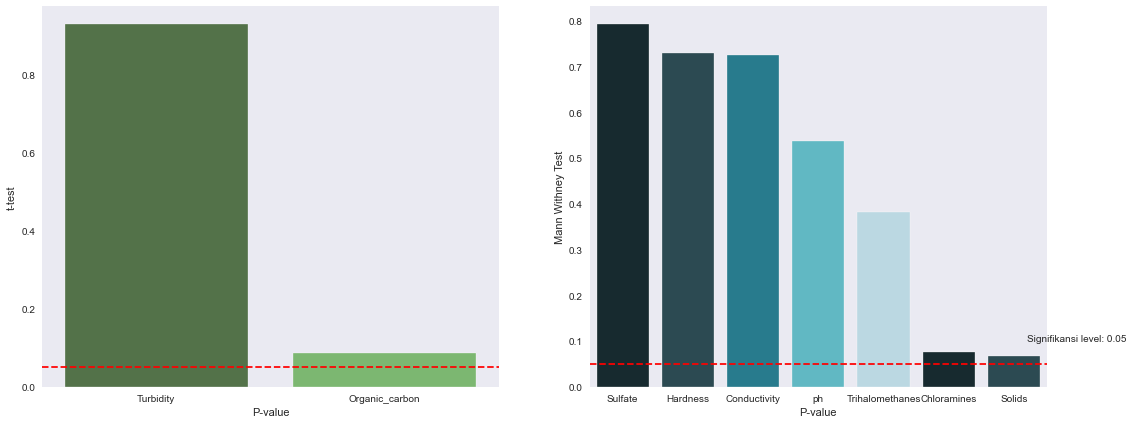

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,7))
sns.barplot(data=ttest, x='columns', y='t-test', ax=ax[0], palette=['#4F7942','#74C365'])   
sns.barplot(data=manwith, x='columns', y='Mann Withney Test', ax=ax[1], palette=["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9'])
ax[0].set_xlabel('P-value')
ax[1].set_xlabel('P-value')
ax[0].axhline(y=0.05, color='red', ls='--')
ax[1].axhline(y=0.05, color='red', ls='--')
ax[1].text(x=6.2, y=0.10, s='Signifikansi level: 0.05')
plt.tight_layout
plt.show()

Dari hasil uji hipotesis, baik yang menggunakan t-test untuk statistik parametrik dan test Mann Whitney untuk statistik Non Parametrik dengan nilai signifikansi 0.05 atau 5%. Kita bisa asumsikan bahwa tidak ada perbedaan yang signifikan dari rata-rata Potability 1 dan Potability 0 dari masing-masing featurenya.

In [16]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075760,-0.082004,-0.031741,0.014178,0.017466,0.040240,0.003145,-0.036107,-0.003014
Hardness,0.075760,1.000000,-0.046899,-0.030054,-0.092833,-0.023915,0.003610,-0.012707,-0.014449,-0.013837
Solids,-0.082004,-0.046899,1.000000,-0.070148,-0.149747,0.013831,0.010242,-0.008799,0.019546,0.033743
Chloramines,-0.031741,-0.030054,-0.070148,1.000000,0.023762,-0.020486,-0.012653,0.016614,0.002363,0.023779
Sulfate,0.014178,-0.092833,-0.149747,0.023762,1.000000,-0.014182,0.027102,-0.025657,-0.009767,-0.020476
Conductivity,0.017466,-0.023915,0.013831,-0.020486,-0.014182,1.000000,0.020966,0.001184,0.005798,-0.008128
Organic_carbon,0.040240,0.003610,0.010242,-0.012653,0.027102,0.020966,1.000000,-0.012958,-0.027308,-0.030001
Trihalomethanes,0.003145,-0.012707,-0.008799,0.016614,-0.025657,0.001184,-0.012958,1.000000,-0.021487,0.006887
Turbidity,-0.036107,-0.014449,0.019546,0.002363,-0.009767,0.005798,-0.027308,-0.021487,1.000000,0.001581
Potability,-0.003014,-0.013837,0.033743,0.023779,-0.020476,-0.008128,-0.030001,0.006887,0.001581,1.000000


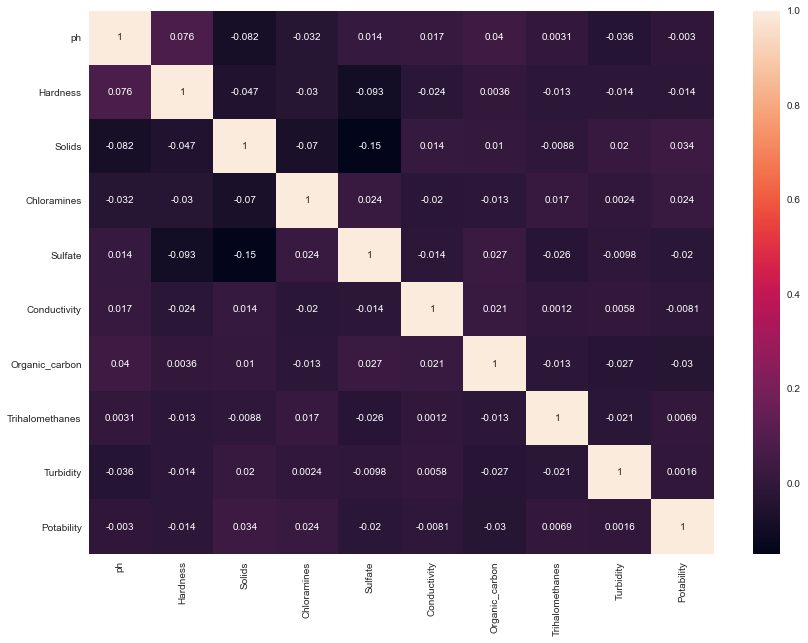

In [17]:
plt.figure(figsize=(14,10))

sns.heatmap(df.corr(), annot=True)
plt.show()

Dapat dilihat dari tabel korelasi dan plot heatmap diatas, tidak terdapat hubungan atau korelasi yang linear baik korelasi terhadap target (fitur Potability) maupun korelasi terhadap masing-masing variabel lainnya. 

# Preprocessing

In [18]:
X = df.drop(columns='Potability')
y = df['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=45)

scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

# Modeling

Dari hasil EDA di atas dapat kita lihat sepertinya model yang cocok adalah dengan model klasifikasi. Kita akan mencoba beberapa model klasifikasi.
- Logistic Regression
- Decission Tree
- KNN Classifier
- Random Forest
- Ada Boost
- Gradient Boost
- Xgboost

Lalu kita akan mencoba mencari model dan hyperparameter terbaik
- Mencari Nilai akurasi terbaik dari setiap model
- Melakukan Hyperparameter tuning untuk model yang terpilih
- Setelah mendapatkan Hyperparameter terbaik kita akan membandingkan masing-masing model
- Melakukan Resampling untuk menentukan apakah ada peningkatan pada model atau tidak.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [42]:
logreg = LogisticRegression(random_state=45)
tree = DecisionTreeClassifier(random_state=45)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=45)
adaboost = AdaBoostClassifier(random_state=45)
gboost = GradientBoostingClassifier(random_state=45)
xgboost = XGBClassifier(random_state=45)

model_list = [logreg, tree, knn, rf, adaboost, gboost, xgboost]
cv_score = []
model = []

for i in model_list:
    cv_score.append(cross_val_score(i, X_train, y_train, scoring='accuracy', cv=5).mean())
    model.append(i)
    
cv_df = pd.DataFrame(columns=['model', 'cv_score'])
cv_df['model'] = model
cv_df['cv_score'] = cv_score

cv_df.sort_values('cv_score', ascending=False)

[12:59:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:59:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:59:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:59:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

,model,cv_score
3,RandomForestClassifier(random_state=45),0.643130
5,GradientBoostingClassifier(random_state=45),0.635878
6,"XGBClassifier(base_score=None, booster=None, c...",0.621374
0,LogisticRegression(random_state=45),0.609924
2,KNeighborsClassifier(),0.602672
4,AdaBoostClassifier(random_state=45),0.597328
1,DecisionTreeClassifier(random_state=45),0.566031


Setelah modeling default diatas kita dapatkan model Random Forest dan Gradient boost yang memiliki nilai akurasi skor diatas dari model lainnya.

Kita akan mencoba mengoptimalkan hyperparameter dari 2 model tersebut dengan melakukan hyperparameter tuning

## 1. Random Forest 

In [21]:
?RandomForestClassifier

In [22]:
param_grid_rf = {
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'max_depth': [5,7,10],
    'min_samples_split': [2,5,7],
    'n_estimators': [100,200],
    'random_state':[45]
}

grid_search_rfc = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=45), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 10],
                         'min_samples_split': [2, 5, 7],
                         'n_estimators': [100, 200], 'random_state': [45]},
             scoring='accuracy')

In [23]:
print('Parameter:', grid_search_rfc.best_params_)
print('Skor:', grid_search_rfc.best_score_)

Parameter: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 7, 'n_estimators': 200, 'random_state': 45}
Skor: 0.6557251908396946


## 2. Gradient Boosting

In [24]:
?GradientBoostingClassifier

In [25]:
param_gboost = {
    'learning_rate': [0.1, 0.3, 0.5],
    'max_depth' : [3, 7, 10],
    'min_samples_split' : [2,5],
    'n_estimators' : [100,200],
    'random_state' : [45]
}
grid_search_gboost = GridSearchCV(estimator=gboost, param_grid=param_gboost, scoring='accuracy', n_jobs=-1)
grid_search_gboost.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=45), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.5],
                         'max_depth': [3, 7, 10], 'min_samples_split': [2, 5],
                         'n_estimators': [100, 200], 'random_state': [45]},
             scoring='accuracy')

In [26]:
print('Parameter:', grid_search_gboost.best_params_)
print('Skor:', grid_search_gboost.best_score_)

Parameter: {'learning_rate': 0.5, 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200, 'random_state': 45}
Skor: 0.6454198473282442


# Test Performance Model

Dari hasil hyperparameter tuning terhadap 2 model yang dipilih, kita mendapatkan model Random Forest dengan nilai akurasi 0.6557. kita akan melakukan test performa model terhadap data test

In [27]:
best_model =  grid_search_rfc.best_estimator_
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=7, n_estimators=200,
                       random_state=45)

In [28]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.95      0.79       400
           1       0.79      0.27      0.40       256

    accuracy                           0.69       656
   macro avg       0.73      0.61      0.60       656
weighted avg       0.72      0.69      0.64       656



<AxesSubplot:>

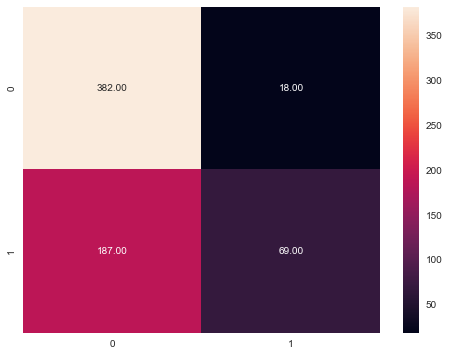

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.2f')

# Resampling

Mengingat proporsi dari data kita 61:39 persen, kita akan mencoba melakukan beberapa resampling untuk mengatasi masalah pada imbalance class, lalu kita lakukan hyperparameter tuning kembali untuk melihat apakah ada peningkatan terhadap performa model

In [30]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [31]:
smote = SMOTE()
X_train_smo, y_train_smo = smote.fit_resample(X_train, y_train)

rf = RandomForestClassifier()

param_grid_rf = {
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'max_depth': [5,7,10],
    'min_samples_split': [2,5,7],
    'n_estimators': [100,200],
    'random_state':[45]
}

gridsearch_smo = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='accuracy', cv=5, n_jobs=-1)
gridsearch_smo.fit(X_train_smo, y_train_smo)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 10],
                         'min_samples_split': [2, 5, 7],
                         'n_estimators': [100, 200], 'random_state': [45]},
             scoring='accuracy')

In [32]:
print('Parameter:', gridsearch_smo.best_params_)
print('Skor:', gridsearch_smo.best_score_)

Parameter: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 45}
Skor: 0.6839813184663537


In [33]:
ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

gridsearch_ros = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='accuracy', cv=5, n_jobs=-1)
gridsearch_ros.fit(X_train_ros, y_train_ros)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 10],
                         'min_samples_split': [2, 5, 7],
                         'n_estimators': [100, 200], 'random_state': [45]},
             scoring='accuracy')

In [34]:
print('Parameter:', gridsearch_ros.best_params_)
print('Skor:', gridsearch_ros.best_score_)

Parameter: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 45}
Skor: 0.7268583724569639


In [35]:
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

gridsearch_rus = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='accuracy', cv=5, n_jobs=-1)
gridsearch_rus.fit(X_train_rus, y_train_rus)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 10],
                         'min_samples_split': [2, 5, 7],
                         'n_estimators': [100, 200], 'random_state': [45]},
             scoring='accuracy')

In [36]:
print('Parameter:', gridsearch_rus.best_params_)
print('Skor:', gridsearch_rus.best_score_)

Parameter: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100, 'random_state': 45}
Skor: 0.6115609569010978


In [37]:
df_resampling = pd.DataFrame({
    "Score": [gridsearch_smo.best_score_, gridsearch_ros.best_score_, gridsearch_rus.best_score_],
}, index=['Random Forest SMOTE', 'Random Forest Over Sampling', 'Random Forest Under Sampling'])
df_resampling.sort_values('Score', ascending=False)

,Score
Random Forest Over Sampling,0.726858
Random Forest SMOTE,0.683981
Random Forest Under Sampling,0.611561


# Perbandingan Sebelum & Sesudah Resampling

In [38]:
best_model_re = gridsearch_ros.best_estimator_
best_model_re.fit(X_train_ros, y_train_ros)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=45)

In [39]:
y_pred = best_model_re.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75       400
           1       0.61      0.50      0.55       256

    accuracy                           0.68       656
   macro avg       0.66      0.65      0.65       656
weighted avg       0.67      0.68      0.67       656



<AxesSubplot:>

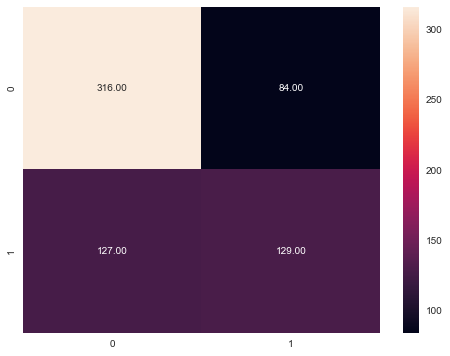

In [40]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.2f')

Model perlu improvment